In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
#pasting dataset api i need
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 156MB/s]
100% 1.06G/1.06G [00:12<00:00, 88.9MB/s]


In [6]:
# unzipping files, paste path
! unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**Loading Image Data**



> image_dataset_from_directory: This function automatically creates TensorFlow Dataset objects from image files in a directory.

> The training and validation datasets are loaded from the specified directories, and the labels are inferred from the directory structure.

> images are resized to (256, 256) pixels and batched into groups of 32 for training and validation.



In [9]:
#Generator
train_ds=keras.utils.image_dataset_from_directory(
directory= '/content/train',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
directory= '/content/test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.



**Preprocessing Data**


> The process function is defined to preprocess images by scaling pixel values to the range [0, 1]

> map function is used to apply the preprocessing function to each image-label pair in the datasets.





In [10]:
# Normalize
def process(image,label):

    image=tf.cast(image/255.,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

**Building the Model No 1**


> image_dataset_from_directory: This function automatically creates TensorFlow Dataset objects from image files in a directory.

> The training and validation datasets are loaded from the specified directories, and the labels are inferred from the directory structure.


> Images are resized to (256, 256) pixels and batched into groups of 32 for training and validation








In [11]:
# create cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

**Compiling the Model No_1**

> The model is compiled with the chosen optimizer, loss function, and evaluation metric.

> Here, 'RMSprop' optimizer, 'binary_crossentropy' loss function, and 'accuracy' metric are used.





In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Early stopping callback is defined to stop training if validation loss does not improve for a certain number of epochs

In [13]:
# early stop
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
monitor="val_loss",
min_delta=0.00001,
patience=8,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False)

**Training the Model No_1**

> The fit method is called to train the model using the training dataset.¶

> Training is performed for 100 epochs with early stopping based on the validation loss.

> Training history (including loss and accuracy) is stored in the history object.



In [14]:
history=model.fit(train_ds,epochs=100,callbacks=callback,validation_data=validation_ds)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.5640 - loss: 2.5049 - val_accuracy: 0.5238 - val_loss: 0.9553
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5918 - loss: 0.6658 - val_accuracy: 0.6188 - val_loss: 0.7830
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6122 - loss: 0.6410 - val_accuracy: 0.6642 - val_loss: 0.6527
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6673 - loss: 0.5899 - val_accuracy: 0.6250 - val_loss: 0.7830
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.7417 - loss: 0.5011 - val_accuracy: 0.6930 - val_loss: 0.6400
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.7765 - loss: 0.4418 - val_accuracy: 0.7448 - val_loss: 0.5714
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.8117 - loss: 0.3885 - val_accuracy: 0.7612 - val_loss: 0.5141
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.8382 - loss: 0

These lines of code use Matplotlib to plot the training and validation accuracy and loss curves over epochs. The first plot displays the training and validation accuracy, while the second plot shows the training and validation loss. These visualizations help in understanding the model's performance and whether it's overfitting or underfitting.

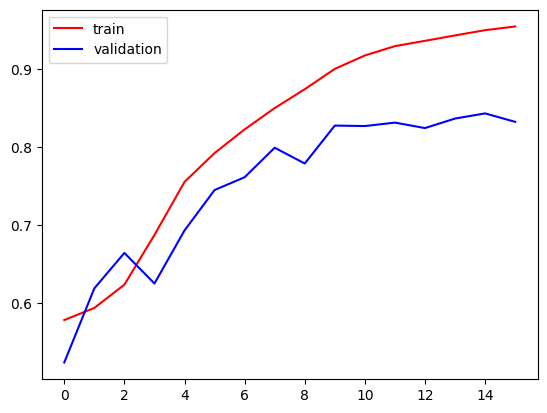

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

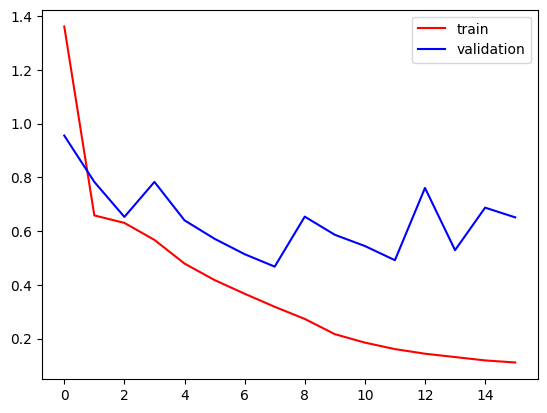

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

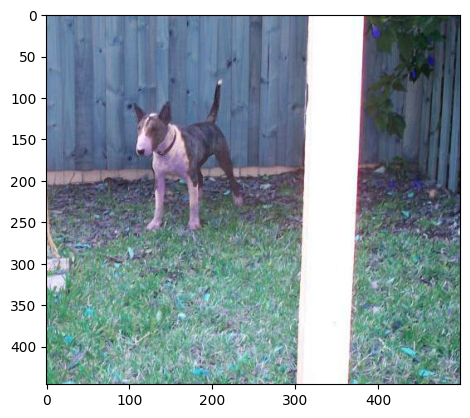

In [17]:
import cv2
test_img=cv2.imread('/content/test/dogs/dog.10073.jpg')
plt.imshow(test_img)

In [18]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)

In [19]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step


array([[1.]], dtype=float32)

**Using pretrained model**

> decode_predictions: This function decodes the prediction results from the VGG16 model into human-readable labels.¶

> VGG16: This class loads the pre-trained VGG16 model. VGG16 is a popular convolutional neural network architecture that has been trained on the ImageNet dataset for image classification.



In [20]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import VGG16

> cv2.resize: This function resizes the test image to the required input size of the VGG16 model, which is (224, 224) pixels.

> reshape: This function reshapes the image array to match the input shape expected by the VGG16 model. The shape is (1, 224, 224, 3), where 1 is the batch size, and 3 represents the number of color channels (RGB).

In [21]:
test_img=cv2.resize(test_img,(224,224))
test_input=test_img.reshape(1,224,224,3)

**Loading the Pre-trained VGG16 Model**



> VGG16: This function loads the pre-trained VGG16 model with weights trained on the ImageNet dataset. weights='imagenet' specifies that we want to load the pre-trained weights.¶
include_top=True means that the fully connected layers (also known as the top layers) of the VGG16 model are included.

> model.predict: This method makes predictions on the test input data using the loaded VGG16 model. It returns the output features of the model.

> decode_predictions: This function decodes the prediction results into human-readable labels. It returns the top K predictions, where K is specified by the top parameter (in this case, 5). The predictions are in the form of a list of tuples, each containing the class label and the associated probabili





In [22]:
model = VGG16(weights='imagenet', include_top=True)

features = model.predict(test_input)
decode_predictions(features, top=5)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02091244', 'Ibizan_hound', 0.21156037),
  ('n02091134', 'whippet', 0.14225642),
  ('n02110806', 'basenji', 0.13428052),
  ('n02087046', 'toy_terrier', 0.10520869),
  ('n02091032', 'Italian_greyhound', 0.093864486)]]

**Loading the VGG16 Convolutional Base & Creating the Model no_2**

* Sequential: Initializes a sequential model.¶
* conv_base: Adds the pre-trained VGG16 convolutional base to the model.
* Flatten: Flattens the output of the convolutional base into a 1D vector.
* Dropout: Regularizes the model by randomly setting a fraction of input units to zero during training to prevent overfitting.
* Dense: Adds fully connected layers. The last layer uses a sigmoid activation function for binary classification.



> model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['acc'])

> This line freezes the weights of the convolutional base, preventing them from being updated during training. This is done to keep the pre-trained weights intact and only train the newly added layers.

> compile: Configures the model for training.

> loss='binary_crossentropy': Specifies the loss function for binary classification tasks.

> optimizer=RMSprop(learning_rate=2e-5): Configures the RMSprop optimizer with a learning rate of 2e-5.

> metrics=['acc']: Specifies that accuracy will be used as a metric to monitor during training

In [23]:
from keras import layers, models, optimizers


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

model2 =Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# early stop
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
monitor="val_loss",
min_delta=0.00001,
patience=8,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False)

In [25]:
history=model2.fit(train_ds,epochs=100,callbacks=callback,validation_data=validation_ds)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 238ms/step - acc: 0.8260 - loss: 0.3724 - val_acc: 0.9236 - val_loss: 0.1861
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 214ms/step - acc: 0.9231 - loss: 0.1903 - val_acc: 0.9390 - val_loss: 0.1531
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 214ms/step - acc: 0.9327 - loss: 0.1628 - val_acc: 0.9356 - val_loss: 0.1509
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 213ms/step - acc: 0.9410 - loss: 0.1476 - val_acc: 0.9392 - val_loss: 0.1412
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - acc: 0.9471 - loss: 0.1303 - val_acc: 0.9322 - val_loss: 0.1611
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 214ms/step - acc: 0.9537 - loss: 0.1231 - val_acc: 0.9392 - val_loss: 0.1397
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - acc: 0.9546 - loss: 0.1166 - val_acc: 0.9332 - val_loss: 0.1614
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - acc: 0.9570 - loss: 0.1127 - val_acc: 0.9412 - val_loss: 0.1422
Epoch 9/100
625/

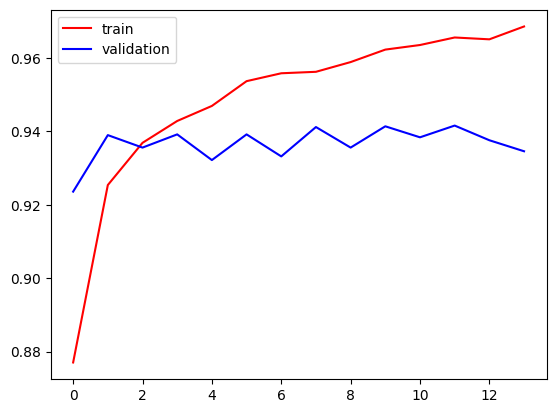

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[1.]], dtype=float32)

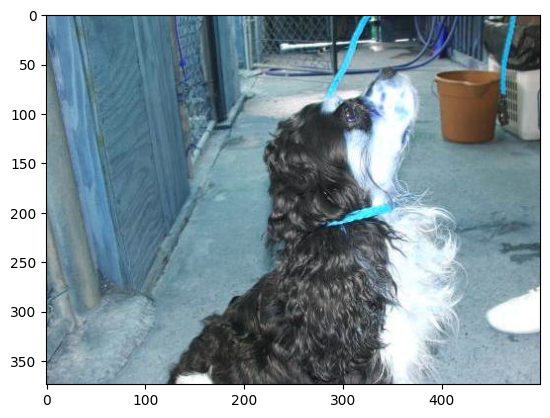

In [27]:
test_img=cv2.imread('/content/test/dogs/dog.10017.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)
model2.predict(test_input)

**Model no_3**

The subsequent block of code iterates through the layers of the convolutional base and sets them as trainable or non-trainable. In this case, the code sets all layers in the VGG16 model as non-trainable except for the layers in block5_conv1 and those following it. This approach allows the model to fine-tune only the deeper layers of the network while keeping the earlier layers fixed.

In [28]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [29]:
# early stop
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
monitor="val_loss",
min_delta=0.00001,
patience=8,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False)

In [30]:
history=model3.fit(train_ds,epochs=100,callbacks=callback,validation_data=validation_ds)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 248ms/step - acc: 0.8221 - loss: 0.3588 - val_acc: 0.9486 - val_loss: 0.1178
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 247ms/step - acc: 0.9569 - loss: 0.1107 - val_acc: 0.9630 - val_loss: 0.0829
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - acc: 0.9709 - loss: 0.0752 - val_acc: 0.9694 - val_loss: 0.0734
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 247ms/step - acc: 0.9812 - loss: 0.0568 - val_acc: 0.9690 - val_loss: 0.0746
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 246ms/step - acc: 0.9862 - loss: 0.0411 - val_acc: 0.9670 - val_loss: 0.0870
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 247ms/step - acc: 0.9903 - loss: 0.0306 - val_acc: 0.9750 - val_loss: 0.0711
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 246ms/step - acc: 0.9932 - loss: 0.0211 - val_acc: 0.9674 - val_loss: 0.0944
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 246ms/step - acc: 0.9957 - loss: 0.0151 - val_acc: 0.9756 - val_loss: 0.0785
Epoch 9/100
625/

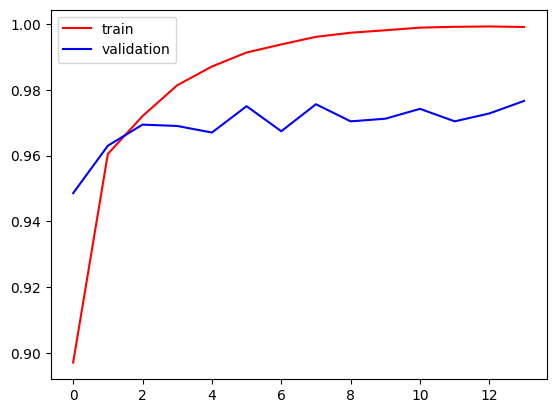

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()